In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tqdm.auto import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

random.seed(123)
print("Setup Complete")

E:\anaconda\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup Complete


In [2]:
sheet_name = ['sample 1', 'sample 2', 'sample 3', 'sample 4', 'sample 5', 'sample 6', 'sample 7', 'sample 8', 'sample 9', \
              'sample 10', 'sample 11', 'sample 12', 'sample 13', 'sample 14', 'sample 15', 'sample 16', 'sample 17', 'sample 18',\
              'sample 19', 'sample 20', 'sample 21', 'sample 22', 'sample 23', 'sample 24', 'sample 25', 'sample 26', 'sample 27',\
              'sample 28', 'sample 29', 'sample 30', 'sample 31', 'sample 32', 'sample 33', 'sample 34', 'sample 35', 'sample 36',\
              'sample 37', 'sample 38', 'sample 39', 'sample 40', 'sample 41', 'sample 42', 'sample 43', 'sample 44', 'sample 45',\
              'sample 46', 'sample 47', 'sample 48', 'sample 49', 'sample 50', 'sample 51', 'sample 52', 'sample 53', 'sample 54',\
              'sample 55', 'sample 56', 'sample 57', 'sample 58', 'sample 59', 'sample 60', 'sample 61', 'sample 62', 'sample 63',\
              'sample 64', 'sample 65', 'sample 66', 'sample 67', 'sample 68', 'sample 69', 'sample 70', 'sample 71', 'sample 72',\
              'sample 73', 'sample 74', 'sample 75', 'sample 76', 'sample 77', 'sample 78', 'sample 79', 'sample 80', 'sample 81',\
              'sample 82', 'sample 83', 'sample 84', 'sample 85', 'sample 86', 'sample 87', 'sample 88', 'sample 89', 'sample 90',\
              'sample 91', 'sample 92', 'sample 93', 'sample 94', 'sample 95', 'sample 96', 'sample 97', 'sample 98']

In [3]:
# load excel sheet
sensor_data_1 = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name='sample 1')

In [4]:
sensor_data_1.head()

,temp,humi,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11
0,322.85,360.98,37.24,33.23,16.67,16.93,21.78,22.94,36.98,29.62,20.25,23.88,21.96
1,324.85,359.98,37.24,33.23,16.67,16.93,20.78,19.94,35.98,22.62,16.25,27.88,29.96
2,322.85,360.98,37.24,34.23,16.67,16.93,21.78,27.94,35.98,18.62,26.25,21.88,25.96
3,324.85,360.98,38.24,34.23,16.67,16.93,20.78,29.94,36.98,24.62,23.25,22.88,31.96
4,325.85,360.98,37.24,34.23,16.67,23.93,21.78,16.94,36.98,20.62,19.25,20.88,32.96


In [5]:
sensor_data_1.shape

(92, 13)

In [6]:
# load excel sheet
sensor_data_81 = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name='sample 81')

In [7]:
sensor_data_81.head()

,temp,humi,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11
0,1647.58,1695.95,117.6,115.07,77.88,64.74,97.84,55.86,181.96,99.85,71.26,155.72,95.81
1,1644.58,1696.95,119.6,114.07,76.88,69.74,94.84,64.86,181.96,96.85,95.26,156.72,109.81
2,1646.58,1696.95,118.6,115.07,76.88,63.74,100.84,48.86,180.96,102.85,82.26,163.72,95.81
3,1644.58,1695.95,118.6,112.07,75.88,64.74,93.84,40.86,181.96,106.85,78.26,160.72,98.81
4,1649.58,1694.95,116.6,108.07,74.88,56.74,89.84,62.86,181.96,94.85,82.26,164.72,107.81


In [8]:
sensor_data_81.shape

(57, 13)

In [9]:
for sheet in sheet_name[:20]:
    tmp_sheet = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name=sheet)
    print("{} dimension: {}".format(sheet, tmp_sheet.shape))

sample 1 dimension: (92, 13)
sample 2 dimension: (75, 13)
sample 3 dimension: (70, 13)
sample 4 dimension: (62, 13)
sample 5 dimension: (57, 13)
sample 6 dimension: (234, 13)
sample 7 dimension: (77, 13)
sample 8 dimension: (71, 13)
sample 9 dimension: (67, 13)
sample 10 dimension: (50, 13)
sample 11 dimension: (52, 13)
sample 12 dimension: (67, 13)
sample 13 dimension: (62, 13)
sample 14 dimension: (62, 13)
sample 15 dimension: (70, 13)
sample 16 dimension: (65, 13)
sample 17 dimension: (67, 13)
sample 18 dimension: (64, 13)
sample 19 dimension: (62, 13)
sample 20 dimension: (64, 13)


In [10]:
label = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\label.xlsx')

In [11]:
label.shape

(98, 4)

In [12]:
label.head()

,sample,gas1,gas2,gas3
0,sample 1,1.0,1.0,2.0
1,sample 2,1.0,1.0,2.0
2,sample 3,1.0,1.0,2.0
3,sample 4,1.0,1.0,2.0
4,sample 5,1.0,2.0,1.0


In [13]:
label.isnull().sum()

sample    0
gas1      4
gas2      4
gas3      4
dtype: int64

In [14]:
label.fillna(0, inplace=True)

In [15]:
label.isnull().sum()

sample    0
gas1      0
gas2      0
gas3      0
dtype: int64

In [16]:
def label_allocation(gas):
    if gas > 0:
        return 1
    else:
        return 0

In [17]:
label['gas1_label'] = label['gas1'].apply(label_allocation)
label['gas2_label'] = label['gas2'].apply(label_allocation)
label['gas3_label'] = label['gas3'].apply(label_allocation)

In [18]:
label.head(20)

,sample,gas1,gas2,gas3,gas1_label,gas2_label,gas3_label
0,sample 1,1.0,1.0,2.0,1,1,1
1,sample 2,1.0,1.0,2.0,1,1,1
2,sample 3,1.0,1.0,2.0,1,1,1
3,sample 4,1.0,1.0,2.0,1,1,1
4,sample 5,1.0,2.0,1.0,1,1,1
5,sample 6,1.0,2.0,1.0,1,1,1
6,sample 7,2.0,1.0,1.0,1,1,1
7,sample 8,2.0,1.0,1.0,1,1,1
8,sample 9,2.0,1.0,1.0,1,1,1
9,sample 10,2.0,1.0,1.0,1,1,1


In [19]:
cols = ['gas1_label', 'gas2_label', 'gas3_label']
label['one_hot'] = label[cols].values.tolist()

In [20]:
label.head()

,sample,gas1,gas2,gas3,gas1_label,gas2_label,gas3_label,one_hot
0,sample 1,1.0,1.0,2.0,1,1,1,"[1, 1, 1]"
1,sample 2,1.0,1.0,2.0,1,1,1,"[1, 1, 1]"
2,sample 3,1.0,1.0,2.0,1,1,1,"[1, 1, 1]"
3,sample 4,1.0,1.0,2.0,1,1,1,"[1, 1, 1]"
4,sample 5,1.0,2.0,1.0,1,1,1,"[1, 1, 1]"


In [21]:
print(len(label['sample'].tolist()))
print("no.of total sample: {}".format(len(label['sample'].tolist())))

98
no.of total sample: 98


In [22]:
train_sample = random.sample(label['sample'].tolist(), int(98 * 0.8))
test_sample = list(set(label['sample'].tolist()).difference(set(train_sample)))

In [23]:
print(train_sample)

['sample 7', 'sample 35', 'sample 12', 'sample 53', 'sample 97', 'sample 14', 'sample 5', 'sample 49', 'sample 69', 'sample 72', 'sample 43', 'sample 44', 'sample 98', 'sample 21', 'sample 18', 'sample 87', 'sample 89', 'sample 88', 'sample 32', 'sample 85', 'sample 1', 'sample 56', 'sample 96', 'sample 91', 'sample 9', 'sample 78', 'sample 41', 'sample 58', 'sample 93', 'sample 6', 'sample 76', 'sample 19', 'sample 17', 'sample 3', 'sample 38', 'sample 59', 'sample 28', 'sample 37', 'sample 31', 'sample 66', 'sample 60', 'sample 54', 'sample 65', 'sample 50', 'sample 20', 'sample 22', 'sample 34', 'sample 71', 'sample 70', 'sample 39', 'sample 82', 'sample 52', 'sample 61', 'sample 79', 'sample 73', 'sample 26', 'sample 42', 'sample 33', 'sample 62', 'sample 94', 'sample 80', 'sample 47', 'sample 27', 'sample 24', 'sample 48', 'sample 77', 'sample 68', 'sample 75', 'sample 36', 'sample 46', 'sample 16', 'sample 95', 'sample 74', 'sample 90', 'sample 11', 'sample 51', 'sample 84', 'sam

In [24]:
print(test_sample)

['sample 63', 'sample 57', 'sample 40', 'sample 83', 'sample 64', 'sample 8', 'sample 92', 'sample 10', 'sample 2', 'sample 67', 'sample 15', 'sample 30', 'sample 23', 'sample 29', 'sample 81', 'sample 45', 'sample 55', 'sample 86', 'sample 25', 'sample 4']


In [25]:
print("no. fo train sample: ", len(train_sample))
print("no. fo test sample: ", len(test_sample))

no. fo train sample:  78
no. fo test sample:  20


In [26]:
for idx, sheet in tqdm(enumerate(train_sample)):
    tmp_sheet = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name=sheet)
    if idx == 0:
        train_df = tmp_sheet 
    else:
        train_df = train_df.append(tmp_sheet)

78it [00:21,  3.69it/s]


In [27]:
for idx, sheet in tqdm(enumerate(test_sample)):
    tmp_sheet = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name=sheet)
    if idx == 0:
        test_df = tmp_sheet 
    else:
        test_df = test_df.append(tmp_sheet)

20it [00:05,  3.88it/s]


In [28]:
mms_tr = MinMaxScaler()
mms_tr.fit(train_df)

zscore_tr = StandardScaler()
zscore_tr.fit(train_df)

StandardScaler()

In [29]:
mms_te = MinMaxScaler()
mms_te.fit(test_df)

zscore_te = StandardScaler()
zscore_te.fit(test_df)

StandardScaler()

In [31]:
time_lag = 30

In [32]:
def making_data(sensor_data, time_lag, scaler = mms_tr, normalize = 'minmax'):
    total_data = []
    sensor_data = sensor_data.values
    
    if normalize == 'minmax':
        sensor_data = scaler.transform(sensor_data)
    else:
        sensor_data = scaler.transform(sensor_data)
        
    for i in range(len(sensor_data) - time_lag + 1):
        tmp_data = sensor_data[i:i+time_lag]
        total_data.append(tmp_data)
        
    total_data = np.array(total_data)
    return total_data

In [33]:
sensor_data_81.shape

(57, 13)

In [34]:
sensor_data_split_81 = making_data(sensor_data_81, time_lag)
sensor_data_split_81.shape

(28, 30, 13)

In [35]:
label.loc[label['sample'] == 'sample 81', 'one_hot'].item()

[0, 1, 1]

In [36]:
label.tail(20)

,sample,gas1,gas2,gas3,gas1_label,gas2_label,gas3_label,one_hot
78,sample 79,0.0,0.5,2.0,0,1,1,"[0, 1, 1]"
79,sample 80,0.0,0.5,2.0,0,1,1,"[0, 1, 1]"
80,sample 81,0.0,0.5,2.0,0,1,1,"[0, 1, 1]"
81,sample 82,0.0,0.5,1.0,0,1,1,"[0, 1, 1]"
82,sample 83,0.0,0.5,1.0,0,1,1,"[0, 1, 1]"
83,sample 84,0.0,0.5,1.0,0,1,1,"[0, 1, 1]"
84,sample 85,0.0,0.5,1.0,0,1,1,"[0, 1, 1]"
85,sample 86,0.0,0.5,2.0,0,1,1,"[0, 1, 1]"
86,sample 87,0.0,0.5,2.0,0,1,1,"[0, 1, 1]"
87,sample 88,1.0,0.5,2.0,1,1,1,"[1, 1, 1]"


In [37]:
train_data = np.empty((0, time_lag, 13, 1), float)
train_y1 = []
train_y2 = []
train_y3 = []

for tr_sample in tqdm(train_sample):
    tmp_data = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name=tr_sample)
    tmp_result = making_data(tmp_data, time_lag, scaler=mms_tr, normalize='minmax')
    tmp_result = tmp_result.reshape(len(tmp_result), time_lag, 13, 1)
    train_data = np.append(train_data, tmp_result, axis=0)
    one_hot = label.loc[label['sample'] == tr_sample, 'one_hot'].item()
    
    for i in range(tmp_result.shape[0]):
        train_y1.append(one_hot[0])
        train_y2.append(one_hot[1])
        train_y3.append(one_hot[2])    

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:19<00:00,  3.98it/s]


In [38]:
train_X = np.array(train_data)
train_y1 = np.array(train_y1)
train_y2 = np.array(train_y2)
train_y3 = np.array(train_y3)

In [39]:
train_X.shape, train_y1.shape, train_y2.shape, train_y3.shape

((3083, 30, 13, 1), (3083,), (3083,), (3083,))

In [40]:
test_data = np.empty((0, time_lag, 13, 1), float)
test_y1 = []
test_y2 = []
test_y3 = []

for ts in tqdm(test_sample):
    tmp_data = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name=ts)
    tmp_result = making_data(tmp_data, time_lag, scaler=mms_te, normalize='minmax')
    tmp_result = tmp_result.reshape(len(tmp_result), time_lag, 13, 1)
    test_data = np.append(test_data, tmp_result, axis=0)
    one_hot = label.loc[label['sample'] == ts, 'one_hot'].item()
    
    for i in range(tmp_result.shape[0]):
        test_y1.append(one_hot[0])
        test_y2.append(one_hot[1])
        test_y3.append(one_hot[2])    

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.98it/s]


In [41]:
test_X = np.array(test_data)
test_y1 = np.array(test_y1)
test_y2 = np.array(test_y2)
test_y3 = np.array(test_y3)

In [42]:
test_X.shape, test_y1.shape, test_y2.shape, test_y3.shape

((742, 30, 13, 1), (742,), (742,), (742,))

## KERAS CNN Model 

In [43]:
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [44]:
tf.random.set_seed(777)

In [45]:
epochs = 100
lr = 0.002
batch_size = 64

$$output = \frac{input - kernel size + (2 \times padding)}{stride} + 1$$

input dimension = batch_size, data_shape, channel  

channel의 경우에는 보통 이미지 분석 시에 RGB값이 들어가는 자리이므로 현재 분석에서는 사용하지 않음

input dimension = (batch_size, 30, 13, 1)

+ padding을 추가하지 않았을 때
    + [{30 - 3 + (2 * 0) } / 1 ]  + 1 = 27
    + [{13 - 3 + (2 * 0) } / 1 ]  + 1 = 11

+ padding 추가 시
    + [{30 - 3 + (2 * 1) } / 1 ]  + 1 = 30
    + [{13 - 3 + (2 * 1) } / 1 ]  + 1 = 13

In [51]:
models = Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(time_lag,13,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 13, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 6, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1344)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [53]:
precision = Precision()
recall = Recall()
early_stopping = EarlyStopping(monitor='loss', verbose=1, patience=3, min_delta=0.001)

In [54]:
models.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['accuracy', precision, recall])

In [55]:
history = models.fit(train_X, train_y1, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/100
49/49 [==============================] - 7s 11ms/step - loss: 0.3415 - accuracy: 0.8871 - precision_1: 0.9049 - recall_1: 0.9782
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.9072 - precision_1: 0.9087 - recall_1: 0.9979
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.1344 - accuracy: 0.9465 - precision_1: 0.9588 - recall_1: 0.9832
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0983 - accuracy: 0.9617 - precision_1: 0.9768 - recall_1: 0.9810
Epoch 5/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9877 - precision_1: 0.9904 - recall_1: 0.9961
Epoch 6/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 0.9951 - precision_1: 0.9968 - recall_1: 0.9979
Epoch 7/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 0.9974 - precision_1: 0.9986 - recall_1: 0.9986
Epoch 8/100
49/49 [

In [56]:
models.evaluate(test_X, test_y1)

24/24 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.9420 - precision_1: 0.9356 - recall_1: 1.0000


[0.6043336987495422, 0.9420484900474548, 0.9356287717819214, 1.0]

In [59]:
y_pred_prob = models.predict(test_X)

In [61]:
y_pred = (y_pred_prob.squeeze() > 0.5).astype('int').tolist()

In [63]:
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score,
                             roc_curve,
                             confusion_matrix,
                             auc)

In [64]:
confusion_matrix(test_y1, y_pred)

array([[ 74,  43],
       [  0, 625]], dtype=int64)

In [65]:
accuracy_score(test_y1, y_pred)

0.9420485175202157

In [66]:
precision_score(test_y1, y_pred)

0.9356287425149701

In [67]:
recall_score(test_y1, y_pred)

1.0

In [68]:
f1_score(test_y1, y_pred)

0.9667440061871616

In [69]:
fpr, tpr, thresholds = roc_curve(test_y1, y_pred_prob)
roc_auc = auc(fpr, tpr)

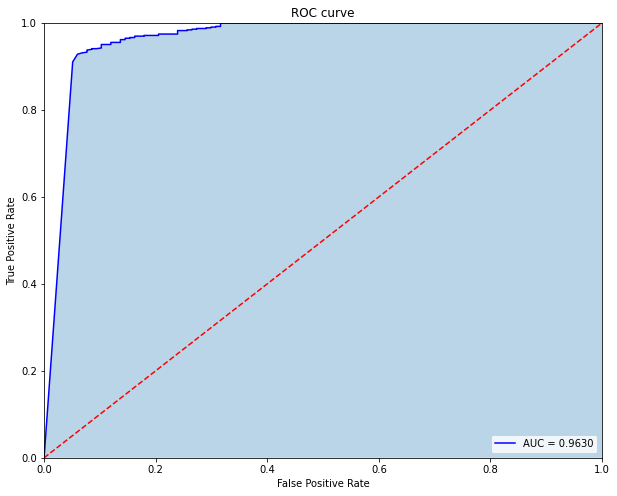

In [70]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.fill_between(fpr, tpr, alpha=0.3)
plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### validation of sample unit 

In [71]:
result_for_gas = label.loc[label['sample'].isin(test_sample), ['sample', 'gas1_label']]
result_for_gas.set_index('sample', inplace=True)
result_for_gas['gas1_predict'] = None

In [72]:
result_for_gas

,gas1_label,gas1_predict
sample,,
sample 2,1,None
sample 4,1,None
sample 8,1,None
sample 10,1,None
sample 15,0,None
sample 23,1,None
sample 25,1,None
sample 29,1,None
sample 30,1,None


In [73]:
ts_idx = result_for_gas.index.tolist()
ts_idx

['sample 2',
 'sample 4',
 'sample 8',
 'sample 10',
 'sample 15',
 'sample 23',
 'sample 25',
 'sample 29',
 'sample 30',
 'sample 40',
 'sample 45',
 'sample 55',
 'sample 57',
 'sample 63',
 'sample 64',
 'sample 67',
 'sample 81',
 'sample 83',
 'sample 86',
 'sample 92']

In [74]:
print(ts_idx)

['sample 2', 'sample 4', 'sample 8', 'sample 10', 'sample 15', 'sample 23', 'sample 25', 'sample 29', 'sample 30', 'sample 40', 'sample 45', 'sample 55', 'sample 57', 'sample 63', 'sample 64', 'sample 67', 'sample 81', 'sample 83', 'sample 86', 'sample 92']


In [78]:
new_test_x = []
for ts in tqdm(ts_idx):
    tmp_data = pd.read_excel(r'E:\ML\input\ai nova\강의_데이터 전처리_part 3\sensor_data.xlsx', sheet_name=ts)
    tmp_result = making_data(tmp_data, time_lag)
    tmp_result = tmp_result.reshape(len(tmp_result), time_lag, 13, 1)
    new_test_x.append(tmp_result)
new_test_x = np.array(new_test_x)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.90it/s]


In [79]:
new_test_x.shape

(20,)

In [80]:
new_test_x[0].shape

(46, 30, 13, 1)

In [81]:
new_test_x[1].shape

(33, 30, 13, 1)

In [83]:
new_test_x[19].shape

(30, 30, 13, 1)

In [85]:
y_pred_tmp = models.predict(new_test_x[0])
y_pred = (y_pred_tmp.squeeze() > 0.5).astype('int')

In [86]:
(y_pred == 0).sum()

0

In [87]:
(y_pred == 1).sum()

46

In [88]:
threshold = np.floor(len(new_test_x[0]) / 2) + 1

In [89]:
threshold

24.0

In [90]:
# total data 
for idx in tqdm(range(len(new_test_x))):
    y_pred_tmp = models.predict(new_test_x[idx])
    y_pred = (y_pred_tmp.squeeze() > 0.5).astype('int')
    
    zero_check = (y_pred == 0).sum()
    threshold = np.floor(len(new_test_x[idx]) / 2) + 1
    
    if zero_check > threshold:
        result_for_gas['gas1_predict'][idx] = 0
    else:
        result_for_gas['gas1_predict'][idx] = 1

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 10.91it/s]


In [91]:
result_for_gas

,gas1_label,gas1_predict
sample,,
sample 2,1,1
sample 4,1,1
sample 8,1,1
sample 10,1,1
sample 15,0,0
sample 23,1,1
sample 25,1,1
sample 29,1,1
sample 30,1,1


In [92]:
y_true_c1 = result_for_gas['gas1_label'].tolist()
y_pred_c1 = result_for_gas['gas1_predict'].tolist()

In [93]:
confusion_matrix(y_true_c1, y_pred_c1)

array([[ 4,  0],
       [ 0, 16]], dtype=int64)

In [94]:
accuracy_score(y_true_c1, y_pred_c1) 

1.0

In [95]:
precision_score(y_true_c1, y_pred_c1)

1.0

In [96]:
recall_score(y_true_c1, y_pred_c1)

1.0

In [97]:
f1_score(y_true_c1, y_pred_c1)

1.0